# LeNet Architecture with sub_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, explained_variance_score

import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
dps1200 = pd.read_csv("dps1200.csv")

In [3]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [5]:
## The model
## Hyperparameters for the network
DENSE = 512      # Number of neurons in the DENSE (a.k.a Fully connected) layer
DROPOUT = 0.5  # Dropout rate
C1_K  = 3       # Number of kernels/filters for conv. first layer
C1_S  = 40      # Width of the filters for first conv. layer
C2_K  = 3       # Number of kernels/filters for second conv. layer
C2_S  = 40 
input_dim = train_data.shape[1]
def make_model():
    """ This functions outputs the CNN model already compiled """
    model = keras.Sequential()
    model.add(keras.layers.Input((input_dim, 1)))
    model.add(keras.layers.GaussianNoise(0.0001))

    model.add(keras.layers.Conv1D(C1_K, (C1_S), padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(keras.layers.Conv1D(C1_K, (C1_S), padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(DENSE, activation='relu'))
    model.add(keras.layers.Dense(1, activation='relu'))
    

    ## Compile options for the model
    model.compile(loss=tf.keras.losses.Huber(), optimizer=keras.optimizers.Adam(learning_rate=0.004), metrics=['mean_absolute_error'])
    return model

model_cnn = make_model()

In [6]:
print(model_cnn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 410, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 371, 3)         │           123 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 185, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 146, 3)         │           363 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 73, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 219)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       112,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,639 (443.90 KB)

 Trainable params: 113,639 (443.90 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
cnn = model_cnn.fit(train_data, train_labels, epochs=1000, batch_size=45, validation_split=0.2)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1730.7705 - mean_absolute_error: 1731.8588 - val_loss: 1559.9563 - val_mean_absolute_error: 1559.7534
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1192.6611 - mean_absolute_error: 1194.5502 - val_loss: 268.0071 - val_mean_absolute_error: 268.1170
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 252.0114 - mean_absolute_error: 252.5433 - val_loss: 190.1846 - val_mean_absolute_error: 189.9140
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.4474 - mean_absolute_error: 197.1122 - val_loss: 181.7625 - val_mean_absolute_error: 181.8442
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 192.9778 - mean_absolute_error: 193.4741 - val_loss: 174.2025 - val_mean_absolute_error: 174.2636
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 171.9878 - mean_absolute_error: 172.4721 - val_loss: 172.0792 - val_mean_absolute_error: 172.4569
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

In [8]:
print(model_cnn.evaluate(test_data, test_labels, verbose=False))

[127.34711456298828, 105.61181640625]


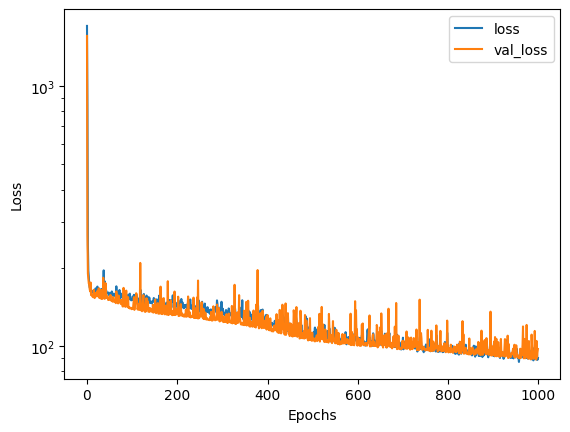

In [9]:
plt.plot(cnn.history['loss'], label='loss')
plt.plot(cnn.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [10]:
predicted = model_cnn.predict(train_data)
predicted_test = model_cnn.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [11]:
## Compute error metrics
def error_metrices(y_true_train, y_predicted_train, y_true_test, y_predicted_test):
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_predicted_train))
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_predicted_test))
    R2_train= r2_score(y_true_train, y_predicted_train)
    R2_test= r2_score(y_true_test, y_predicted_test)

    print('\n\n*********** Benchmark results ***********\n')
    print(f"R2    (Train/Test) = {R2_train:.3f} / {R2_test:.3f}")
    print(f"RMSE  (Train/Test) = {rmse_train:.3f} / {rmse_test:.3f}")
    

error_metrices(train_labels, predicted, test_labels, predicted_test)



*********** Benchmark results ***********

R2    (Train/Test) = 0.502 / 0.453
RMSE  (Train/Test) = 137.719 / 148.567


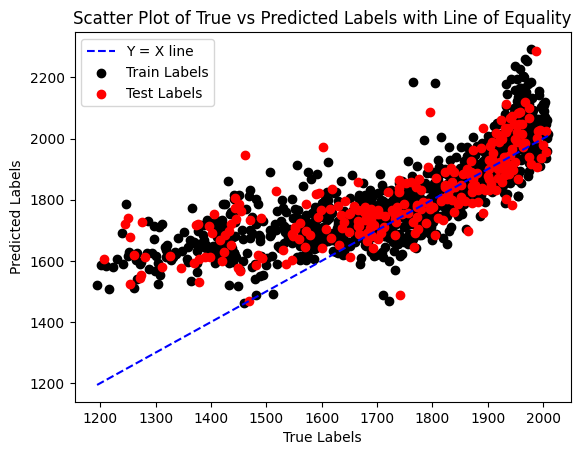

In [12]:
# Create an array of x-values ranging from the minimum to maximum of the data
x_values = np.linspace(min(labels), max(labels), 100)

# Plot the line of equality (y=x)
plt.plot(x_values, x_values, color='blue', linestyle='--', label='Y = X line')

# Scatter plot for predicted values
plt.scatter(train_labels, predicted[:, 0], c='k', label='Train Labels')
plt.scatter(test_labels, predicted_test[:, 0], c='r', label='Test Labels')

# Labels, legend, and title
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.title('Scatter Plot of True vs Predicted Labels with Line of Equality')

# Show the plot
plt.show()